# Flight Price Prediction


Problem Statement Description -

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records


FEATURES -

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 
I have to use skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_flight_train = pd.read_excel(r"C:\Users\Shiva Labade\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df_flight_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df_flight_train.shape

(10683, 11)

In the given dataset we have 10683 rows and 11 columns including target columns.

In [8]:
df_flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df_flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df_flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Statistical description

In [11]:
df_flight_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
df_flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#EDA -

Checking the null values in the dataset

In [13]:
df_flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [23]:
df_flight_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
47h 40m      1
3h 25m       1
13h 35m      1
30h 10m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [24]:
df_flight_train.dropna(inplace = True)

In [25]:
flight_cat = df_flight_train.select_dtypes(include='object')

In [26]:
flight_cat.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [27]:
df_flight_train["Journey_day"] = pd.to_datetime(df_flight_train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [28]:
df_flight_train["Journey_month"] = pd.to_datetime(df_flight_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Dataset Visualization - 

In [30]:
for i in flight_cat.columns:
    x = flight_cat[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Airline --------
 Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


-------- Date_of_Journey --------
 18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/201

<AxesSubplot:xlabel='Price', ylabel='Density'>

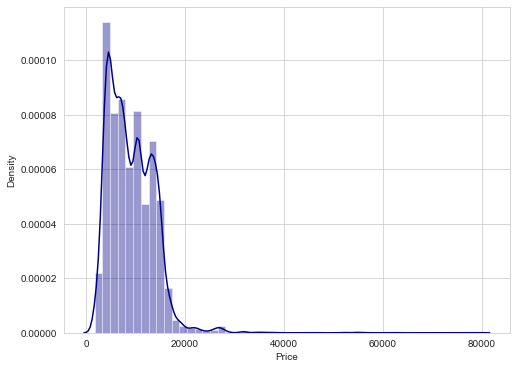

In [31]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df_flight_train['Price'], color = 'darkblue')

The price in the given dataset is rightly skewed.

In [34]:
count_attri = df_flight_train[['Airline','Source','Destination','Total_Stops','Additional_Info']]

#for i in count_attri.columns:
 #  plt.figure(figsize=(12,4))
  #  x = sns.countplot(count_attri[i], hue='Price', data=df_flight_train)
   #plt.show()

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

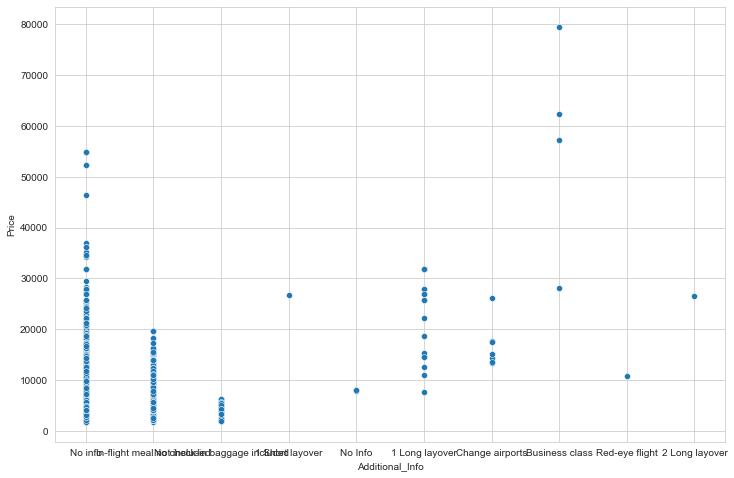

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Additional_Info', y='Price', data=df_flight_train)

In [36]:
stop_mode = df_flight_train['Total_Stops'].mode()
print("Mode of Total_Stops :", stop_mode)

Mode of Total_Stops : 0    1 stop
dtype: object


In [37]:
df_flight_train.Total_Stops = df_flight_train.Total_Stops.fillna('1 stop')

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
dtype: int64


<AxesSubplot:>

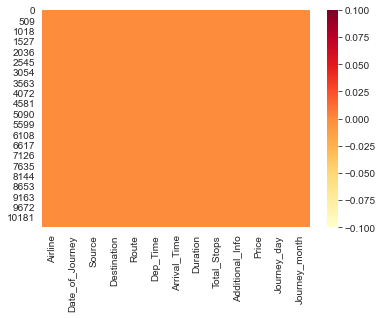

In [38]:
print(df_flight_train.isnull().sum())
sns.heatmap(df_flight_train.isnull(), cmap = 'YlOrRd')

In [39]:
df_flight_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

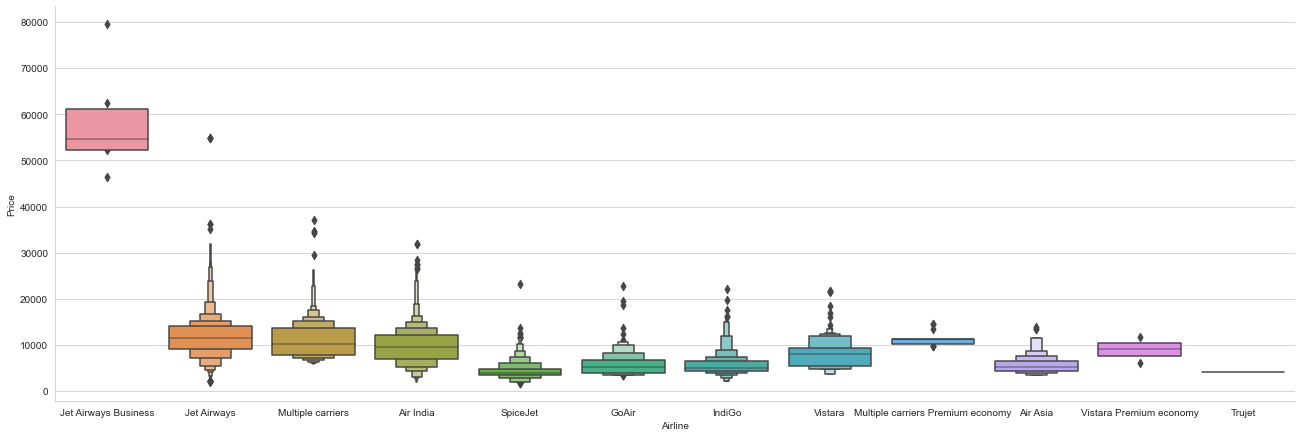

In [42]:
sns.catplot(y = "Price", x = "Airline", data = df_flight_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [43]:
Airline = df_flight_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

In [44]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [45]:
df_flight_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [47]:
Source = df_flight_train[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head(3)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


Coverting the Dataset - 

The attributes -> 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' and 'Duration' are of object type in the dataset, but these are need to be converted into date time datat type respectively in order to make the data more clear about such columns and better predictions can be made.

In [48]:
df_flight_train['Journey_Day'] = pd.to_datetime(df_flight_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_flight_train['Journey_Month'] = pd.to_datetime(df_flight_train.Date_of_Journey, format="%d/%m/%Y").dt.month


In [49]:
df_flight_train['Dep_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Dep_Minute'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute


In [50]:
df_flight_train['Arrival_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Arrival_Minute'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute


In [51]:
df_flight_train['Duration_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Duration_Minute'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute


In [52]:
print("----Journey_Day---- \n",df_flight_train['Journey_Day'].value_counts())
print("\n")
print("----Journey_Month---- \n",df_flight_train['Journey_Month'].value_counts())

----Journey_Day---- 
 9     1406
6     1287
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Journey_Day, dtype: int64


----Journey_Month---- 
 5    3465
6    3414
3    2724
4    1079
Name: Journey_Month, dtype: int64


In [53]:
df_flight_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_day,Journey_month,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,24,3,22,20,22,20,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,1,5,5,50,5,50,5,50


In [54]:
df_flight_train.drop(['Route', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Airline', 'Source', 'Destination', 'Total_Stops'], axis=1, inplace = True)


In [55]:
df_flight_train.head()

,Price,Journey_day,Journey_month,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,3897,24,3,24,3,22,20,22,20,22,20
1,7662,1,5,1,5,5,50,5,50,5,50
2,13882,9,6,9,6,9,25,9,25,9,25
3,6218,12,5,12,5,18,5,18,5,18,5
4,13302,1,3,1,3,16,50,16,50,16,50


In [56]:
df_flight_train.shape

(10682, 11)

# TEST DATA

In [58]:
df_flight_test = pd.read_excel(r"C:\Users\Shiva Labade\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df_flight_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [59]:
df_flight_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [60]:
df_flight_train.shape

(10682, 11)

Checking null values

In [61]:
df_flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [62]:
df_flight_test['Journey_Day'] = pd.to_datetime(df_flight_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_flight_test['Journey_Month'] = pd.to_datetime(df_flight_test.Date_of_Journey, format="%d/%m/%Y").dt.month

df_flight_test['Dep_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Dep_Minute'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute

df_flight_test['Arrival_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Arrival_Minute'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute

df_flight_test['Duration_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Duration_Minute'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute

In [63]:
Airline = df_flight_test[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

Source = df_flight_test[['Source']]
Source = pd.get_dummies(Source, drop_first = True)

Destination = df_flight_test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)

df_flight_test['Total_Stops'] = df_flight_test.Total_Stops.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})


In [64]:
df_flight_test = pd.concat([df_flight_test, Airline, Source, Destination], axis = 1)


In [65]:
df_flight_test.drop(['Route', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Airline', 'Source', 'Destination', 'Total_Stops'], axis=1, inplace = True)


In [66]:
df_flight_test.head()


,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,17,30,17,30,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,6,20,6,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,15,19,15,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,8,0,8,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,23,55,23,55,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
df_flight_test.shape


(2671, 27)

In [68]:
df_flight_train.describe()


,Price,Journey_day,Journey_month,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,13.509081,4.708575,13.509081,4.708575,12.491013,24.409287,12.491013,24.409287,12.491013,24.409287
std,4611.548810,8.479363,1.164408,8.479363,1.164408,5.748820,18.767801,5.748820,18.767801,5.748820,18.767801
min,1759.000000,1.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,6.000000,3.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000
50%,8372.000000,12.000000,5.000000,12.000000,5.000000,11.000000,25.000000,11.000000,25.000000,11.000000,25.000000
75%,12373.000000,21.000000,6.000000,21.000000,6.000000,18.000000,40.000000,18.000000,40.000000,18.000000,40.000000
max,79512.000000,27.000000,6.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000


In [69]:
df_flight_test.describe()


,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,...,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.915762,4.718458,12.603519,24.891426,12.603519,24.891426,12.603519,24.891426,0.164732,0.017222,...,0.000749,0.028079,0.428678,0.265818,0.069637,0.428678,0.118682,0.069637,0.028079,0.089105
std,8.260824,1.170851,5.686673,19.086522,5.686673,19.086522,5.686673,19.086522,0.371008,0.130122,...,0.027359,0.165231,0.494980,0.441851,0.254582,0.494980,0.323475,0.254582,0.165231,0.284949
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,5.000000,12.000000,25.000000,12.000000,25.000000,12.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,6.000000,18.000000,45.000000,18.000000,45.000000,18.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df_flight_train.columns


Index(['Price', 'Journey_day', 'Journey_month', 'Journey_Day', 'Journey_Month',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hour', 'Duration_Minute'],
      dtype='object')

Checking correlation -

In [71]:
train_corr = df_flight_train[['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour', 'Duration_Minute']]

<AxesSubplot:>

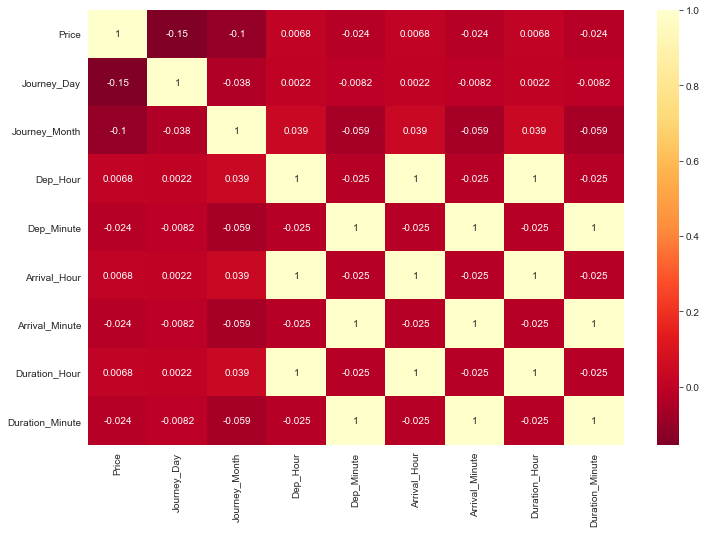

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(train_corr.corr(), cmap= "YlOrRd_r", annot= True)

Checking skewness -

In [73]:
df_flight_train.skew()


Price              1.812405
Journey_day        0.118174
Journey_month     -0.387409
Journey_Day        0.118174
Journey_Month     -0.387409
Dep_Hour           0.112924
Dep_Minute         0.167234
Arrival_Hour       0.112924
Arrival_Minute     0.167234
Duration_Hour      0.112924
Duration_Minute    0.167234
dtype: float64

Removing Outliers

In [74]:
from scipy.stats import zscore

z = np.abs(zscore(df_flight_train))
print(z.shape)

df_flight_train = df_flight_train.loc[(z<3).all(axis=1)]
print(df_flight_train.shape)

(10682, 11)
(10586, 11)


In [75]:
for col in df_flight_train.columns:
    if df_flight_train.skew().loc[col]>0.55:
        df_flight_train[col]=np.sqrt(df_flight_train[col])

In [76]:
df_flight_train.skew()


Price              0.411969
Journey_day        0.110224
Journey_month     -0.407965
Journey_Day        0.110224
Journey_Month     -0.407965
Dep_Hour           0.112246
Dep_Minute         0.173982
Arrival_Hour       0.112246
Arrival_Minute     0.173982
Duration_Hour      0.112246
Duration_Minute    0.173982
dtype: float64

In [77]:
df_flight_test.skew()


Journey_Day                                   0.199540
Journey_Month                                -0.403700
Dep_Hour                                      0.093759
Dep_Minute                                    0.128515
Arrival_Hour                                  0.093759
Arrival_Minute                                0.128515
Duration_Hour                                 0.093759
Duration_Minute                               0.128515
Airline_Air India                             1.808687
Airline_GoAir                                 7.425946
Airline_IndiGo                                1.570462
Airline_Jet Airways                           0.695618
Airline_Jet Airways Business                 36.523949
Airline_Multiple carriers                     2.202763
Airline_Multiple carriers Premium economy    29.804900
Airline_SpiceJet                              3.152294
Airline_Vistara                               4.216176
Airline_Vistara Premium economy              36.523949
Source_Che

In [78]:
from scipy.stats import zscore

z = np.abs(zscore(df_flight_test))
print(z.shape)

df_flight_test = df_flight_test.loc[(z<3).all(axis=1)]
print(df_flight_test.shape)

(2671, 27)
(1905, 27)


In [79]:
for col in df_flight_test.columns:
    if df_flight_test.skew().loc[col]>0.55:
        df_flight_test[col]=np.sqrt(df_flight_test[col])

In [80]:
df_flight_train.skew()

Price              0.411969
Journey_day        0.110224
Journey_month     -0.407965
Journey_Day        0.110224
Journey_Month     -0.407965
Dep_Hour           0.112246
Dep_Minute         0.173982
Arrival_Hour       0.112246
Arrival_Minute     0.173982
Duration_Hour      0.112246
Duration_Minute    0.173982
dtype: float64

In [90]:
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [91]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [92]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
X = df_flight_train.drop(columns=["Price"])
y = df_flight_train[["Price"]]

In [102]:
print(X.shape)
print(y.shape)

(10586, 10)
(10586, 1)


In [103]:
X.head()

,Journey_day,Journey_month,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,24,3,24,3,22,20,22,20,22,20
1,1,5,1,5,5,50,5,50,5,50
2,9,6,9,6,9,25,9,25,9,25
3,12,5,12,5,18,5,18,5,18,5
4,1,3,1,3,16,50,16,50,16,50


In [105]:
y.head()


,Price
0,3897
1,7662
2,13882
3,6218
4,13302


Scaling the dataset -

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.23068857, -1.48833212,  1.23068857, ..., -0.23092425,
         1.65529109, -0.23092425],
       [-1.49249579,  0.23839086, -1.49249579, ...,  1.37101818,
        -1.30395447,  1.37101818],
       [-0.54530123,  1.10175235, -0.54530123, ...,  0.03606615,
        -0.6076614 ,  0.03606615],
       ...,
       [ 1.58588653, -0.62497063,  1.58588653, ..., -0.23092425,
        -0.78173467, -0.23092425],
       [-1.49249579, -1.48833212, -1.49249579, ...,  0.30305656,
        -0.25951486,  0.30305656],
       [-0.54530123,  0.23839086, -0.54530123, ...,  1.63800859,
        -0.43358813,  1.63800859]])

In [107]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [108]:
def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print ("Train acc",reg.score(X_train,y_train))
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [109]:
rg = Ridge()
parameters = {"alpha":[0,0.0001,0.001,0.01,0.1,1]}
gd = GridSearchCV(rg, parameters)
gd.fit(X, y)
gd.best_params_

{'alpha': 1}

In [110]:
lreg = Lasso()
parameters = {"alpha":[0,0.0001,0.001,0.01,0.1,1]}
gd = GridSearchCV(lreg, parameters)
gd.fit(X, y)
gd.best_params_

{'alpha': 1}

In [111]:
lr = LinearRegression()
lreg = Lasso(alpha=0.001)
rg = Ridge(alpha=0.1)
sv = SVR()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()

In [114]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))

In [115]:
model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.03201193681696868 achieved at 58


Train acc 0.019618967910153384


Mean Absolute Error :  58.474289060959194


RMSE :  4004.9805635558064


Cross validation score (Mean r2 score): 0.01788000165805812
Standard Deviationin r2 score : 0.008481842287596516




-------- Lasso --------
Maximum r2 score : 0.031877690689856686 achieved at 58


Train acc 0.019618967909898144


Mean Absolute Error :  58.47428954086478


RMSE :  4004.9806586189184


Cross validation score (Mean r2 score): 0.01812047361626119
Standard Deviationin r2 score : 0.008443617657182576




-------- Ridge --------
Maximum r2 score : 0.031877644622691714 achieved at 58


Train acc 0.0196189679094666


Mean Absolute Error :  58.474289987861816


RMSE :  4004.9806205095992


Cross validation score (Mean r2 score): 0.018120481404866662
Standard Deviationin r2 score : 0.008443580833825001




-------- SVR --------


UnboundLocalError: local variable 'final_r_state' referenced before assignment

Saving the given model

In [116]:
import joblib
joblib.dump(rfr, 'flight_price.pkl')

['flight_price.pkl']